In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num

%matplotlib inline

In [3]:
#read in all 5 nyc files
nyc_2015 = pd.read_csv('../data/nyc2015.csv')
nyc_2016 = pd.read_csv('../data/nyc2016.csv')
nyc_2017 = pd.read_csv('../data/nyc2017.csv')
nyc_2018 = pd.read_csv('../data/nyc2018.csv')
nyc_2019 = pd.read_csv('../data/nyc2019.csv')

In [4]:
#add year column to each race
nyc_2015['year'] = '2015'
nyc_2016['year'] = '2016'
nyc_2017['year'] = '2017'
nyc_2018['year'] = '2018'
nyc_2019['year'] = '2019'

In [5]:
#confirming first 10k per year
print(nyc_2015.shape)
print(nyc_2016.shape)
print(nyc_2017.shape)
print(nyc_2018.shape)
print(nyc_2019.shape)

(10000, 21)
(10000, 21)
(10000, 21)
(10000, 21)
(10000, 21)


In [6]:
#understanding fields in data
nyc_2016.loc[3034]

Unnamed: 0                        3034
runnerId                      19788849
firstName                       Nicole
lastName                     Muldowney
bib                               6244
age                                 26
birthdate          1990-06-13T00:00:00
gender                               F
city                        Birmingham
countryCode                        USA
stateProvince                       AL
iaaf                               USA
overallPlace                      3035
overallTime                    3:22:04
pace                             07:43
genderPlace                        377
ageGradeTime                     22:04
ageGradePlace                      923
ageGradePercent                  67.02
racesCount                           2
year                              2016
Name: 3034, dtype: object

In [7]:
#concat all race files
nyc_races = pd.concat([nyc_2015, nyc_2016,nyc_2017,nyc_2018,nyc_2019], axis=0)

In [8]:
nyc_races.head()

,Unnamed: 0,runnerId,firstName,lastName,bib,age,birthdate,gender,city,countryCode,...,iaaf,overallPlace,overallTime,pace,genderPlace,ageGradeTime,ageGradePlace,ageGradePercent,racesCount,year
0,0,16619869,Stanley,Biwott,5,29,1986-04-21T00:00:00,M,Eldoret,KEN,...,KEN,1,2:10:34,04:59,1,10:34,2,94.18,2,2015
1,1,16654079,Geoffery,Kamworor,6,22,1992-11-22T00:00:00,M,Kapchorwa District,KEN,...,KEN,2,2:10:48,05:00,2,10:48,3,94.00,4,2015
2,2,16611443,Lelisa,Desisa,2,25,1990-01-14T00:00:00,M,Addis Ababa,ETH,...,ETH,3,2:12:10,05:03,3,12:10,4,93.03,5,2015
3,3,16616462,Wilson,Kipsang,1,33,1982-03-15T00:00:00,M,Iten,KEN,...,KEN,4,2:12:45,05:04,4,12:36,5,92.73,5,2015
4,4,16654080,Yemane,Tsegay,7,30,1985-04-08T00:00:00,M,Addis Ababa,ETH,...,ETH,5,2:13:24,05:06,5,13:24,6,92.18,1,2015


In [9]:
#remove/drop columns that are not needed: Unnamed: 0 for now (Maybe later: ageGradeTime, ageGradePlace, ageGradePercent,racesCount) 
nyc_races = nyc_races.drop(columns = ['Unnamed: 0','bib'], axis=1)
nyc_races.columns

Index(['runnerId', 'firstName', 'lastName', 'age', 'birthdate', 'gender',
       'city', 'countryCode', 'stateProvince', 'iaaf', 'overallPlace',
       'overallTime', 'pace', 'genderPlace', 'ageGradeTime', 'ageGradePlace',
       'ageGradePercent', 'racesCount', 'year'],
      dtype='object')

In [10]:
nyc_races.loc[nyc_races['runnerId'] == 19788849]

,runnerId,firstName,lastName,age,birthdate,gender,city,countryCode,stateProvince,iaaf,overallPlace,overallTime,pace,genderPlace,ageGradeTime,ageGradePlace,ageGradePercent,racesCount,year
3034,19788849,Nicole,Muldowney,26,1990-06-13T00:00:00,F,Birmingham,USA,AL,USA,3035,3:22:04,07:43,377,22:04,923,67.02,2,2016


Rename columns for readability and shorten names, combine first and last name to 'full_name'


In [11]:
nyc_races['full_name'] = nyc_races['firstName'] + ' ' + nyc_races['lastName']
nyc_races = nyc_races.rename(columns={'runnerId': 'id', 'birthdate': 'dob','countryCode': 'country',
                                      'stateProvince': 'state',
                                     'overallPlace': 'place','overallTime': 'time',
                                     'genderPlace': 'gender_place',
                                     'ageGradeTime': 'age_grade_time',
                                      'ageGradePlace': 'age_grade_place',
                                      'ageGradePercent': 'age_grade_percent',
                                      'racesCount': 'nyrr_races'})

Add full name and year columns to left positions, drop first and last name columns

In [12]:
nyc_races.insert(1, 'full_name', nyc_races.pop('full_name'))
nyc_races.insert(2,'year',nyc_races.pop('year'))
nyc_races = nyc_races.drop(columns = ['firstName','lastName'],axis=1)

create age bins/buckets

In [13]:
nyc_races['age_group'] = pd.cut(x=nyc_races['age'],
                          bins=[10, 19, 29, 39, 49, 59, 69, 79, 89], 
                          labels=['10-19','20-29', '30-39', '40-49','50-59','60-69','70-79','80-89'])


In [14]:
nyc_races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 50000 non-null  int64   
 1   full_name          50000 non-null  object  
 2   year               50000 non-null  object  
 3   age                50000 non-null  int64   
 4   dob                49999 non-null  object  
 5   gender             50000 non-null  object  
 6   city               49989 non-null  object  
 7   country            50000 non-null  object  
 8   state              27040 non-null  object  
 9   iaaf               49999 non-null  object  
 10  place              50000 non-null  int64   
 11  time               50000 non-null  object  
 12  pace               50000 non-null  object  
 13  gender_place       50000 non-null  int64   
 14  age_grade_time     50000 non-null  object  
 15  age_grade_place    50000 non-null  int64   
 16  age_g

Change time to timedelta from object, remove dob time portion

In [15]:
nyc_races['time'] = pd.to_timedelta(nyc_races['time'])
nyc_races['dob'] = nyc_races['dob'].str.rstrip('T00:00:00')

Export clean combined results to csv - do not need to run this again

In [16]:
#nyc_races.to_csv('../data/clean_nyc.csv')

In [17]:
nyc_races['country'].value_counts() #135 countries

USA    27049
ITA     2797
FRA     2488
GBR     2044
ESP     1580
       ...  
KGZ        1
ZWE        1
QAT        1
BHR        1
VUT        1
Name: country, Length: 135, dtype: int64

In [18]:
year_country_counts = nyc_races.groupby(['year']).country.value_counts()
year_country_counts

year  country
2015  USA        5368
      FRA         574
      ITA         507
      GBR         365
      ESP         309
                 ... 
2019  TGO           1
      TTO           1
      VNM           1
      VUT           1
      ZWE           1
Name: country, Length: 466, dtype: int64

In [19]:
#remove iaaf, gender_place columns
nyc_races = nyc_races.drop(columns = ['iaaf','gender_place'],axis=1)

In [20]:
nyc_races.head()

,id,full_name,year,age,dob,gender,city,country,state,place,time,pace,age_grade_time,age_grade_place,age_grade_percent,nyrr_races,age_group
0,16619869,Stanley Biwott,2015,29,1986-04-21,M,Eldoret,KEN,NaN,1,02:10:34,04:59,10:34,2,94.18,2,20-29
1,16654079,Geoffery Kamworor,2015,22,1992-11-22,M,Kapchorwa District,KEN,NaN,2,02:10:48,05:00,10:48,3,94.00,4,20-29
2,16611443,Lelisa Desisa,2015,25,1990-01-14,M,Addis Ababa,ETH,NaN,3,02:12:10,05:03,12:10,4,93.03,5,20-29
3,16616462,Wilson Kipsang,2015,33,1982-03-15,M,Iten,KEN,NaN,4,02:12:45,05:04,12:36,5,92.73,5,30-39
4,16654080,Yemane Tsegay,2015,30,1985-04-08,M,Addis Ababa,ETH,NaN,5,02:13:24,05:06,13:24,6,92.18,1,30-39


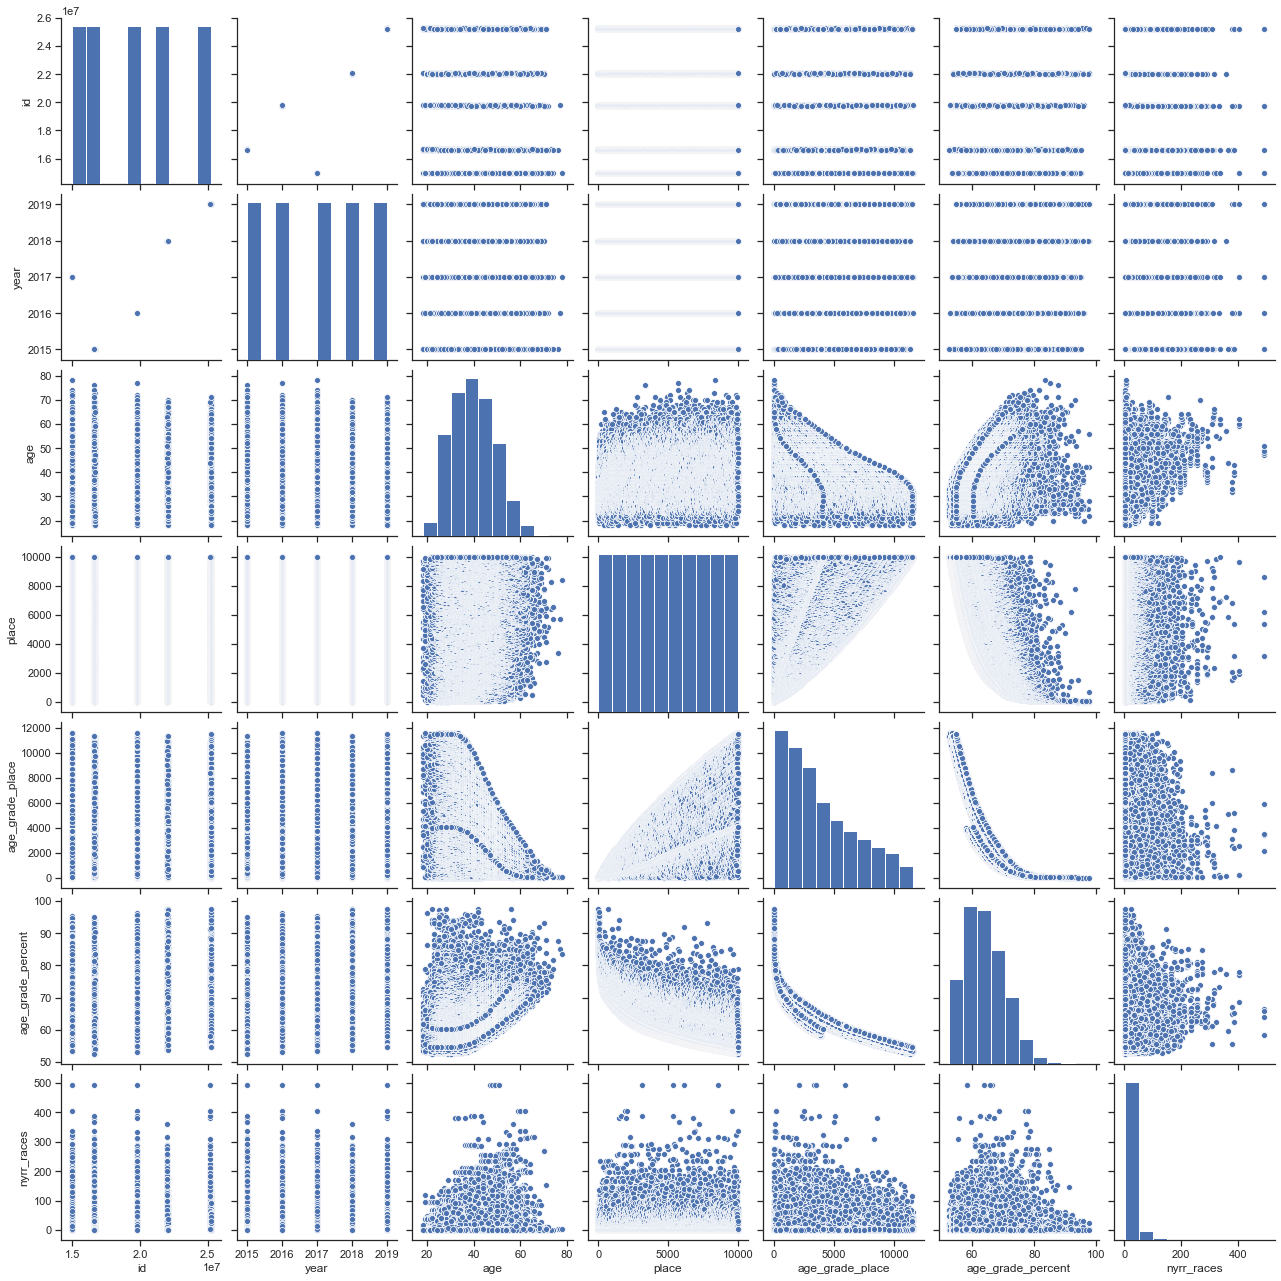

In [21]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(nyc_races)

# Age Grading eda
https://www.runnersworld.com/advanced/a20794116/a-guide-to-age-grading/

In [22]:
nyc_races['age_grade_percent'].describe().to_frame()

,age_grade_percent
count,50000.000000
mean,64.228865
std,6.600073
min,52.590000
25%,59.270000
50%,63.370000
75%,68.500000
max,97.600000


In [23]:
nyc_races['time'].astype('timedelta64[ns]').describe()

count                     50000
mean     0 days 03:26:28.893920
std      0 days 00:18:20.673329
min             0 days 02:05:59
25%             0 days 03:15:08
50%             0 days 03:30:05
75%             0 days 03:41:07
max             0 days 03:53:47
Name: time, dtype: object

In [28]:
#nyc_races['time'].astype('datetime64[ns]').dt.time.describe()

# Group by Sex - Female vs Male comparison

In [31]:
nyc_gender_counts = nyc_races.groupby(['year']).gender.value_counts()

In [32]:
nyc_gender_counts = nyc_gender_counts.to_frame()
nyc_gender_counts

gender
year gender        
2015 M         7706
     F         2294
2016 M         7852
     F         2148
2017 M         7930
     F         2070
2018 M         7836
     F         2164
2019 M         7791
     F         2209

Note: multi-index dataframe works best to .unstack to plot below

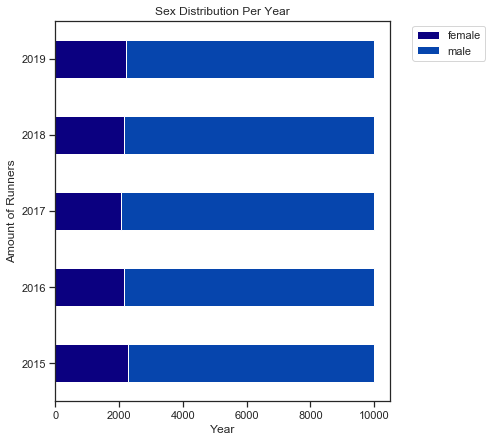

In [34]:
#WANT TO possibly use percentages as well to display above
colors = {'#0645ad', '#0b0080'} #e5e5e5'
nyc_gender_counts.unstack(level=1).plot(kind='barh',figsize = (6,7), stacked = True, subplots=False, color = colors)
ssfont = {'fontname':'sans-serif'}

L=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
L.get_texts()[1].set_text('male')
L.get_texts()[0].set_text('female')

plt.ylabel('Amount of Runners')
plt.xlabel('Year')
plt.title('Sex Distribution Per Year',**ssfont);
#plt.savefig('genderdist.png')          


# Group by Sex per year - Average Finish Times

Need to convert time to an integer when grouping by year/gender in order to get the average > then convert to timedelta

In [35]:
nyc_races['time'] = nyc_races['time'].astype('int64') #or can call np.int64
nyc_groupby_gender = nyc_races.groupby(['year','gender']).time.mean().astype('timedelta64[ns]').to_frame().reset_index()#.astype(np.int64).mean()
nyc_groupby_gender

,year,gender,time
0,2015,F,03:36:59.981255
1,2015,M,03:28:57.110692
2,2016,F,03:34:29.166201
3,2016,M,03:27:21.895822
4,2017,F,03:32:37.985990
5,2017,M,03:25:26.733543
6,2018,F,03:30:46.949168
7,2018,M,03:23:02.761995
8,2019,F,03:27:32.916251
9,2019,M,03:19:13.344628


separate out female and male into dataframes to plot

In [36]:
nyc_groupby_gender_female = nyc_groupby_gender.loc[(nyc_groupby_gender['gender'] == 'F')].reset_index()
nyc_groupby_gender_male = nyc_groupby_gender.loc[(nyc_groupby_gender['gender'] == 'M')].reset_index()

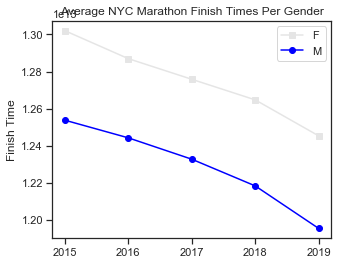

In [37]:
#times not displaying correctly here - see correct graph below
fig= plt.figure(figsize=(5,4))
plt.plot(nyc_groupby_gender_female['year'],nyc_groupby_gender_female['time'],color='#e5e5e5',label='F',marker='s')
plt.plot(nyc_groupby_gender_male['year'],nyc_groupby_gender_male['time'],color='blue',label='M',marker='o')
plt.title('Average NYC Marathon Finish Times Per Gender', fontdict=None, loc='center')
plt.ylabel('Finish Time')
plt.legend();

Need to convert to datetime and then set format

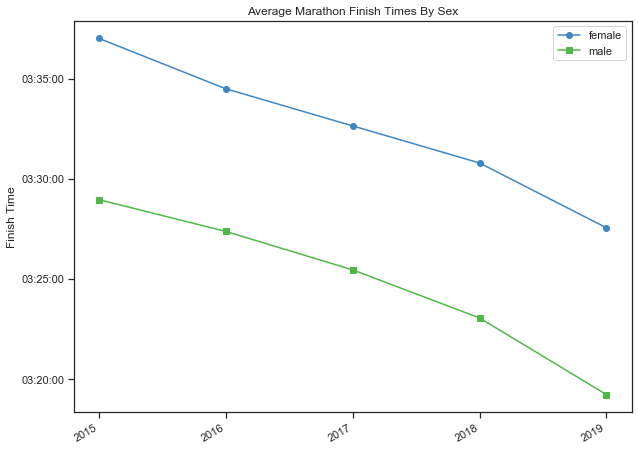

In [38]:
nyc_groupby_gender_female['time'] = nyc_groupby_gender_female['time'].values.astype('datetime64[ns]')
nyc_groupby_gender_male['time'] = nyc_groupby_gender_male['time'].values.astype('datetime64[ns]')

fig, ax = plt.subplots(figsize=(10,8))

myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)

ax.plot(nyc_groupby_gender_female['year'], nyc_groupby_gender_female['time'],color='#3d85c6',label='female',marker='o')
ax.plot(nyc_groupby_gender_male['year'], nyc_groupby_gender_male['time'],color='#50b848',label='male',marker='s')


plt.gcf().autofmt_xdate()

plt.title('Average Marathon Finish Times By Sex', fontdict=None, loc='center')
plt.ylabel('Finish Time')
plt.legend();
plt.show()

Colors from website
  -  border-color: #e5e5e5;
  -  color: #191919;
  -  #0b0080, color: #0645ad

In [39]:
nyc_races.dtypes

id                      int64
full_name              object
year                   object
age                     int64
dob                    object
gender                 object
city                   object
country                object
state                  object
place                   int64
time                    int64
pace                   object
age_grade_time         object
age_grade_place         int64
age_grade_percent     float64
nyrr_races              int64
age_group            category
dtype: object

# PACE

In [40]:
#add hour places so that pace can convert to timedelta
nyc_races['pace'] = '00:' + nyc_races['pace']

In [41]:
nyc_races['pace'] = pd.to_timedelta(nyc_races['pace'])
nyc_races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   id                 50000 non-null  int64          
 1   full_name          50000 non-null  object         
 2   year               50000 non-null  object         
 3   age                50000 non-null  int64          
 4   dob                49999 non-null  object         
 5   gender             50000 non-null  object         
 6   city               49989 non-null  object         
 7   country            50000 non-null  object         
 8   state              27040 non-null  object         
 9   place              50000 non-null  int64          
 10  time               50000 non-null  int64          
 11  pace               50000 non-null  timedelta64[ns]
 12  age_grade_time     50000 non-null  object         
 13  age_grade_place    50000 non-null  int64       

Group by Age/Gender by Pace

In [42]:
nyc_races['pace'] = nyc_races['pace'].astype('int64') #or can call np.int64
nyc_groupby_gender_pace = nyc_races.groupby(['year','gender']).pace.mean().astype('timedelta64[ns]').to_frame().reset_index()
nyc_groupby_gender_pace

,year,gender,pace
0,2015,F,00:08:17.061900
1,2015,M,00:07:58.644043
2,2016,F,00:08:11.305865
3,2016,M,00:07:55.014136
4,2017,F,00:08:07.067632
5,2017,M,00:07:50.621689
6,2018,F,00:08:02.833179
7,2018,M,00:07:45.131955
8,2019,F,00:07:55.443639
9,2019,M,00:07:36.383006


In [43]:
nyc_groupby_gender_pace.dtypes

year               object
gender             object
pace      timedelta64[ns]
dtype: object

In [44]:
nyc_groupby_pace_female = nyc_groupby_gender_pace.loc[(nyc_groupby_gender_pace['gender'] == 'F')].reset_index()
nyc_groupby_pace_male = nyc_groupby_gender_pace.loc[(nyc_groupby_gender_pace['gender'] == 'M')].reset_index()

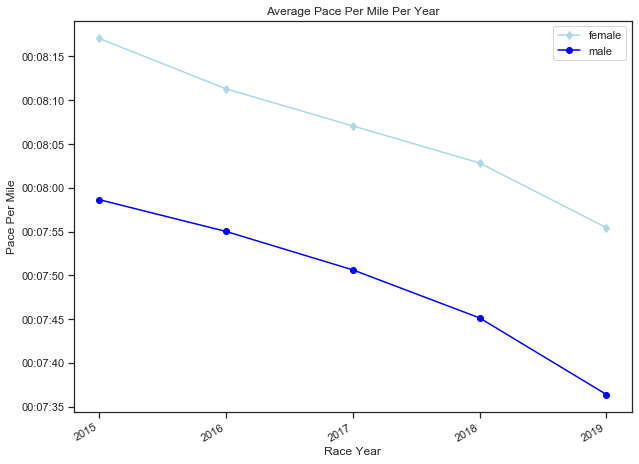

In [45]:
nyc_groupby_pace_female['pace'] = nyc_groupby_pace_female['pace'].values.astype('datetime64[ns]')
nyc_groupby_pace_male['pace'] = nyc_groupby_pace_male['pace'].values.astype('datetime64[ns]')

fig, ax = plt.subplots(figsize=(10,8))

myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)


ax.plot(nyc_groupby_pace_female['year'], nyc_groupby_pace_female['pace'],color='lightblue',label = 'female',marker='d')
ax.plot(nyc_groupby_pace_male['year'], nyc_groupby_pace_male['pace'],color='blue',label='male',marker='o')
#ax.xaxis_date()
plt.gcf().autofmt_xdate()

plt.title('Average Pace Per Mile Per Year', fontdict=None, loc='center')
plt.ylabel('Pace Per Mile')
plt.xlabel('Race Year')
plt.legend();
plt.show()

# Age Group Dataframe - Average Finish Times

In [46]:
#convert age_group from category to string in order to group by, 'time' has to be astype('int64') before mean is called
nyc_races['age_group'] = nyc_races['age_group'].astype(str)
nyc_groupby_age = nyc_races.groupby(['year','gender','age_group']).time.mean().astype('timedelta64[ns]').to_frame().reset_index()#.astype(np.int64).mean()
nyc_groupby_age

,year,gender,age_group,time
0,2015,F,10-19,03:42:21.800000
1,2015,F,20-29,03:35:55.349549
2,2015,F,30-39,03:36:04.758782
3,2015,F,40-49,03:37:39.066165
4,2015,F,50-59,03:41:22.323671
...,...,...,...,...
61,2019,M,30-39,03:16:41.760312
62,2019,M,40-49,03:20:18.511609
63,2019,M,50-59,03:24:47.160162
64,2019,M,60-69,03:30:23.329268


In [47]:
nyc_groupby_age_bucket = nyc_groupby_age.drop(columns ='year')
nyc_groupby_age_bucket['time'] = nyc_groupby_age_bucket['time'].astype('int64')
nyc_groupby_age_bucket = nyc_groupby_age_bucket.groupby(['age_group','gender']).time.mean().astype('timedelta64[ns]').to_frame().reset_index()
nyc_groupby_age_bucket

,age_group,gender,time
0,10-19,F,03:35:12.760000
1,10-19,M,03:23:20.730093
2,20-29,F,03:31:00.265201
3,20-29,M,03:21:09.770233
4,30-39,F,03:30:47.053758
5,30-39,M,03:22:37.817610
6,40-49,F,03:34:19.380331
7,40-49,M,03:25:41.344936
8,50-59,F,03:38:03.379607
9,50-59,M,03:29:55.168586


In [48]:
nyc_groupby_age_female = nyc_groupby_age_bucket.loc[(nyc_groupby_age_bucket['gender'] == 'F')].reset_index()
nyc_groupby_age_male = nyc_groupby_age_bucket.loc[(nyc_groupby_age_bucket['gender'] == 'M')].reset_index()

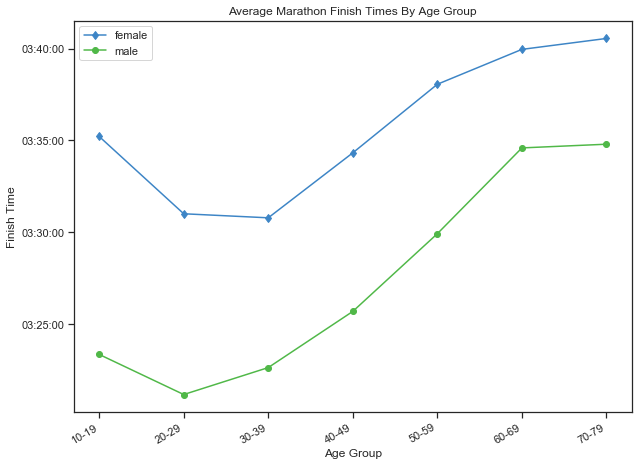

In [49]:
#WANT TO MAKE THIS A BAR GRAPH?
nyc_groupby_age_female['time'] = nyc_groupby_age_female['time'].values.astype('datetime64[ns]')
nyc_groupby_age_male['time'] = nyc_groupby_age_male['time'].values.astype('datetime64[ns]')

fig, ax = plt.subplots(figsize=(10,8))

myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)


ax.plot(nyc_groupby_age_female['age_group'], nyc_groupby_age_female['time'],color='#3d85c6',label = 'female',marker='d')
ax.plot(nyc_groupby_age_male['age_group'], nyc_groupby_age_male['time'],color='#50b848',label='male',marker='o')

plt.gcf().autofmt_xdate()

plt.title('Average Marathon Finish Times By Age Group', fontdict=None, loc='center')
plt.ylabel('Finish Time')
plt.xlabel('Age Group')
plt.legend();
plt.show()

In [50]:
#Have 5 side by side graphs per year of age group/gender legend of pace

'''fig, ((ax1, ax2,ax3), (ax4, ax5)) = plt.subplots(3, 2)
fig.suptitle('Pace Per Year Per Age Group')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')
ax5.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()'''

"fig, ((ax1, ax2,ax3), (ax4, ax5)) = plt.subplots(3, 2)\nfig.suptitle('Pace Per Year Per Age Group')\nax1.plot(x, y)\nax2.plot(x, y**2, 'tab:orange')\nax3.plot(x, -y, 'tab:green')\nax4.plot(x, -y**2, 'tab:red')\nax5.plot(x, -y**2, 'tab:red')\n\nfor ax in fig.get_axes():\n    ax.label_outer()"

# Analyze Pace per Age Group for 2019 Marathon

In [51]:
age_group_pace_2019 = nyc_races.groupby(['year','gender','age_group']).pace.mean().astype('timedelta64[ns]').to_frame().reset_index()#.astype(np.int64).mean()
age_group_pace_2019 = age_group_pace_2019.loc[(age_group_pace_2019['year']=='2019')]
age_group_pace_2019

,year,gender,age_group,pace
53,2019,F,10-19,00:08:09
54,2019,F,20-29,00:07:52.702276
55,2019,F,30-39,00:07:51.107189
56,2019,F,40-49,00:07:58.966521
57,2019,F,50-59,00:08:08.408045
58,2019,F,60-69,00:08:13.400000
59,2019,M,10-19,00:07:25.642857
60,2019,M,20-29,00:07:27.175392
61,2019,M,30-39,00:07:30.603121
62,2019,M,40-49,00:07:38.864226


In [52]:
age_group_pace_2019_female = age_group_pace_2019.loc[(age_group_pace_2019['gender'] == 'F')].reset_index()
age_group_pace_2019_male = age_group_pace_2019.loc[(age_group_pace_2019['gender'] == 'M')].reset_index()

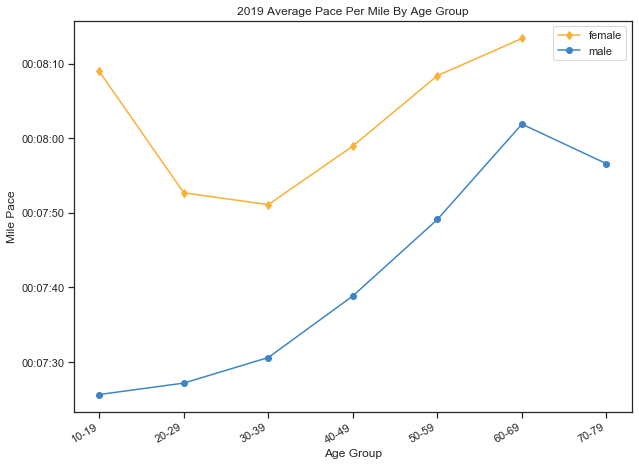

In [53]:
age_group_pace_2019_female['pace'] = age_group_pace_2019_female['pace'].values.astype('datetime64[ns]')
age_group_pace_2019_male['pace'] = age_group_pace_2019_male['pace'].values.astype('datetime64[ns]')

fig, ax = plt.subplots(figsize=(10,8))
myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)

ax.plot(age_group_pace_2019_female['age_group'], age_group_pace_2019_female['pace'],color='#fab034',label = 'female',marker='d')
ax.plot(age_group_pace_2019_male['age_group'], age_group_pace_2019_male['pace'],color='#3d85c6',label='male',marker='o')

plt.gcf().autofmt_xdate()

plt.title('2019 Average Pace Per Mile By Age Group', fontdict=None, loc='center') #,color='blue')
plt.ylabel('Mile Pace') #,color='#ef4136')
plt.xlabel('Age Group') #,color='#ef4136')
plt.legend()
plt.show();